# Extract, transform, load

In [81]:
import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn

In [13]:
print(torch.__version__)

1.4.0


In [21]:
train_set = torchvision.datasets.FashionMNIST(
    root='data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ]))

Extracting data/FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to data/FashionMNIST\FashionMNIST\raw


Extracting data/FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data/FashionMNIST\FashionMNIST\raw




Extracting data/FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data/FashionMNIST\FashionMNIST\raw


Extracting data/FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data/FashionMNIST\FashionMNIST\raw
Processing...
Done!


In [37]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

In [25]:
torch.set_printoptions(linewidth=120)

In [40]:
len(train_set)

60000

In [39]:
train_set.train_labels

tensor([9, 0, 0,  ..., 3, 0, 5])

In [41]:
train_set.train_labels.bincount() #balanced data set

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [44]:
sample = next(iter(train_set))

In [46]:
len(sample)

2

In [47]:
type(sample)

tuple

In [48]:
image, label = sample

In [52]:
image.shape

torch.Size([1, 28, 28])

label 9


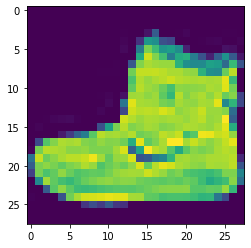

In [56]:
plt.imshow(image.squeeze())
print('label', label)

label 9


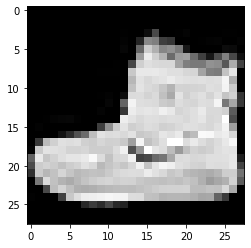

In [57]:
plt.imshow(image.squeeze(), cmap='gray')
print('label', label)

In [58]:
batch = next(iter(train_loader))

In [59]:
len(batch)

2

In [60]:
type(batch)

list

In [61]:
images, labels = batch

In [62]:
images.shape

torch.Size([10, 1, 28, 28])

In [63]:
labels.shape

torch.Size([10])

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


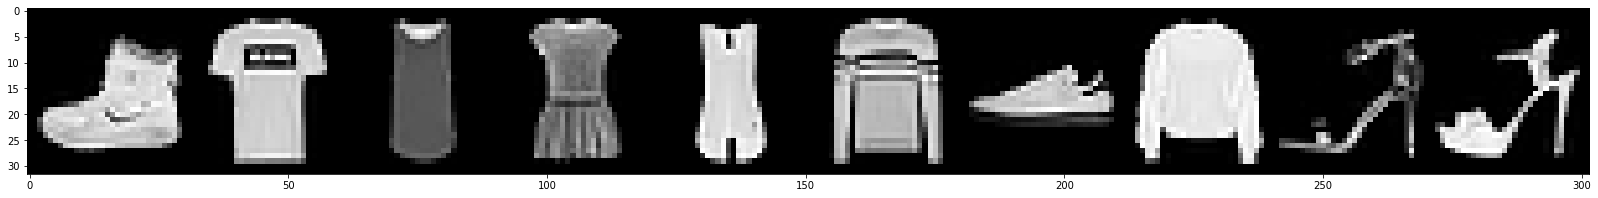

In [77]:
grid = torchvision.utils.make_grid(images, nrow = 10)

plt.figure(figsize=(28,28))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

In [91]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        t = self.layer(t)
        return t

In [92]:
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [93]:
network.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

In [94]:
network.conv2

Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))

In [95]:
network.fc1

Linear(in_features=192, out_features=120, bias=True)

In [96]:
network.fc2

Linear(in_features=120, out_features=60, bias=True)

In [97]:
network.out

Linear(in_features=60, out_features=10, bias=True)

In [98]:
network.conv1.weight

Parameter containing:
tensor([[[[ 6.1247e-02,  1.3285e-01, -9.7709e-02,  3.8388e-02, -1.9749e-01],
          [ 8.0089e-02, -1.8056e-01,  1.9877e-01, -6.2050e-03, -1.2544e-02],
          [ 1.4415e-01, -1.9184e-01,  6.0691e-02,  1.7213e-01, -5.3579e-02],
          [-8.6552e-02,  1.3991e-01,  9.5330e-02, -1.2599e-02, -5.3515e-02],
          [-1.6442e-01,  1.8519e-01,  1.0188e-01,  6.1596e-02, -1.8978e-01]]],


        [[[-1.0549e-02, -1.5170e-01, -1.1684e-01,  1.4659e-01, -4.2475e-02],
          [-8.8858e-02, -2.9743e-03, -7.5168e-03, -6.8053e-02, -8.5512e-02],
          [-1.6927e-01,  1.2612e-02, -1.6030e-01, -6.5502e-02,  1.7035e-01],
          [ 1.2319e-01,  7.4697e-02,  4.4651e-02, -1.4137e-01, -6.3120e-02],
          [ 1.0483e-01,  1.9533e-01, -1.2232e-02, -1.9213e-01,  1.7421e-01]]],


        [[[-4.9678e-02, -8.1137e-02,  1.5922e-01, -1.0540e-02,  5.9567e-02],
          [ 6.8831e-02,  1.7278e-01,  1.4081e-01,  1.5493e-01,  1.9677e-04],
          [ 1.1478e-01,  1.6813e-01, -3.4438e-

In [102]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [103]:
network.conv2.weight.shape

torch.Size([12, 6, 5, 5])

In [105]:
network.fc1.weight.shape

torch.Size([120, 192])

In [107]:
network.fc2.weight.shape

torch.Size([60, 120])

In [109]:
network.out.weight.shape

torch.Size([10, 60])

In [110]:
network.conv2.weight[0].shape

torch.Size([6, 5, 5])